### Assignment : LOGISTIC REGRESSION

 Predict whether the client has subscribed a term deposit or not using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sns.set()

In [6]:
data = pd.read_csv('C:/Users/HP/Downloads/excelr assignments/logistic regression/bank-full.csv',sep=';')

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


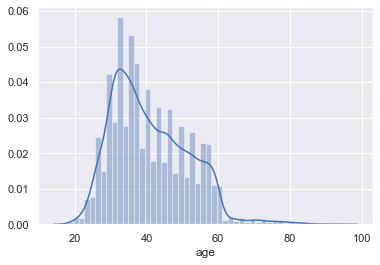

In [12]:
sns.distplot(data['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029FB9C73160>]],
      dtype=object)

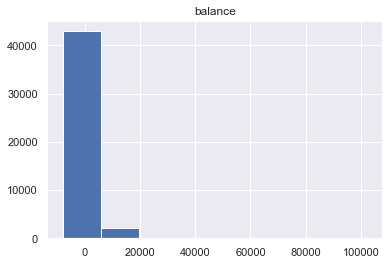

In [13]:
data.hist('balance', bins = 8)

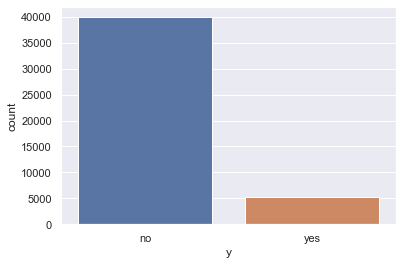

In [14]:
sns.countplot(data['y'])

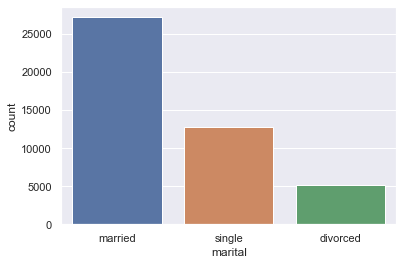

In [15]:
sns.countplot(data['marital'])

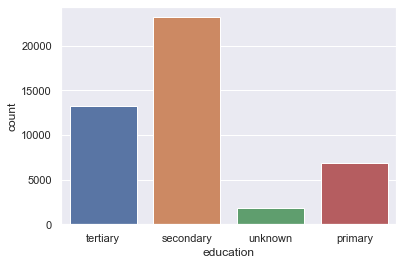

In [16]:
sns.countplot(data['education'])

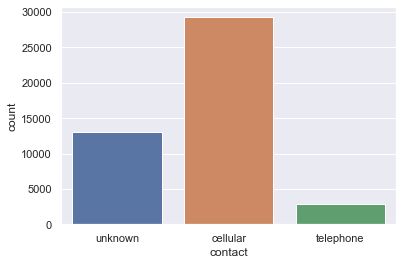

In [17]:
sns.countplot(data['contact'])

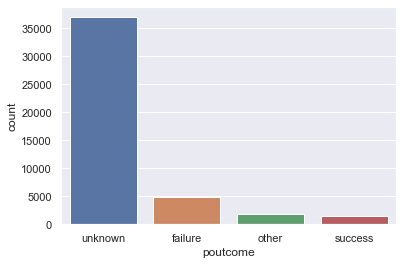

In [18]:
sns.countplot(data['poutcome'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [21]:
data_with_dummies = pd.get_dummies(data, drop_first = True)

In [22]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [23]:
pd.set_option('display.max_columns', None)
data_with_dummies

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [24]:
targets = data_with_dummies['y']
inputs = data_with_dummies.drop('y', axis =1)

In [25]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, random_state = 42)

In [27]:
reg = LogisticRegression()
results = reg.fit(X_train, y_train)
results.score(X_train, y_train)

0.9028842750973222

## Making Predictions

In [28]:
y_hat = results.predict(X_test)

In [29]:
compare_df = pd.DataFrame()
compare_df['Actual Values'] = y_test
compare_df['Predictions'] = y_hat
compare_df

,Actual Values,Predictions
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13847,0,0
10200,0,0
32106,1,0
25565,0,0


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
print(confusion_matrix)

[[9692  258]
 [ 885  468]]


In [31]:
np.unique(y_hat, return_counts = True)

(array([0, 1], dtype=int64), array([10577,   726], dtype=int64))

In [32]:
np.unique(y_test, return_counts = True)

(array([0, 1], dtype=int64), array([9950, 1353], dtype=int64))

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.898876404494382

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.64      0.35      0.45      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.88      0.90      0.89     11303



Text(0, 0.5, 'True Positive Rate')

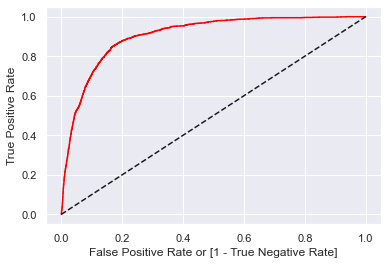

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, results.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_hat)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [36]:
df_metrics = pd.DataFrame()
df_metrics['False Positive Rate'] = fpr
df_metrics['True Positive Rate'] = tpr
df_metrics['thresholds'] = thresholds
df_metrics


,False Positive Rate,True Positive Rate,thresholds
0,0.000000,0.000000,1.999930
1,0.000000,0.000739,0.999930
2,0.000000,0.001478,0.999527
3,0.000101,0.001478,0.999433
4,0.000101,0.002956,0.996637
...,...,...,...
1547,0.919397,0.998522,0.006954
1548,0.919397,0.999261,0.006953
1549,0.934673,0.999261,0.006222
1550,0.934673,1.000000,0.006217


In [37]:
auc

0.6599841780966919

In [38]:
y_pred = (results.predict_proba(X_test)[:,1] >= 0.2).astype('int')
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9072  878]
 [ 440  913]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9950
           1       0.51      0.67      0.58      1353

    accuracy                           0.88     11303
   macro avg       0.73      0.79      0.76     11303
weighted avg       0.90      0.88      0.89     11303



OBSERVATION:
    
From the dataset, found that there exists no insignificant values and the accuracy using RF found to be more than logistic regression technique.